# Practice Code for group project

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
%matplotlib inline

In [136]:
tidedata = "ASTR19_F23_group_project_data.txt"
filein = open(tidedata,"r")
content = filein.readlines()



## Intra-day Graph

C:\Users\Elias Alvarez\AppData\Local\Temp\ipykernel_38324\242587217.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(test_hours, test_hight_int, 'r-',color = 'orange', label = 'Interpolation')


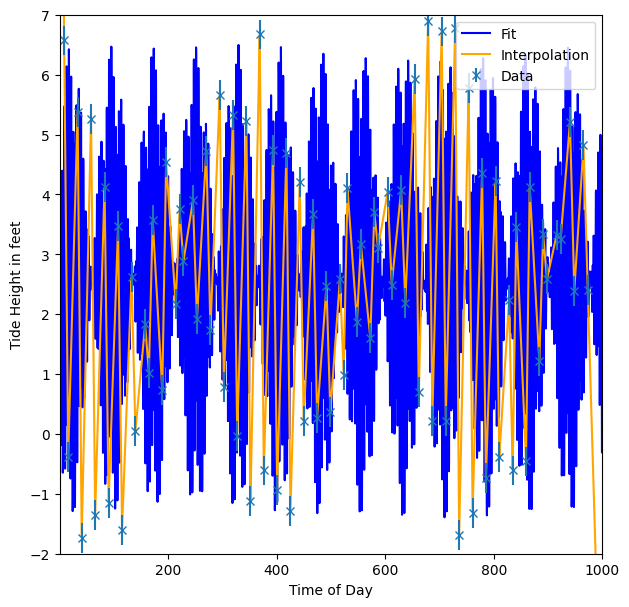

In [259]:
#--------------------------------------------------------Concept Setup----------------------------------------------------------
y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


for i in range(82):
    x.append( list2[i] +hours[i] + mins_converted[i])

#-----------------------------Best Fit Line----------------------------------

# create a function that for a given time(in hours), comoputes a hight using linear interpolation
hight_interpol = interpolate.interp1d(x, y, kind = 'linear', fill_value = 'extrapolate')

#define the fit model
def hight_model(x_1, a, b, c, d, e, f, g, h):
    return a*(np.sin((x_1*b)+c)*(np.sin((x_1*d)+e)*np.sin((x_1*f)+g))) + h

#preform the fit
params, params_cov = optimize.curve_fit(hight_model, x, y, p0 = [2, 1, 1, 1, 1, 1, 1, 2.5])   #Stearting parameters for a, b, c, and d

# define the error array
param_err = np.sqrt(np.diag(params_cov))

#use the fitted parameters to define a best-fit function
def hight_fit(x_1):
    return hight_model(x_1, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7])
# alternarively hight model(hours, **params)

n = 5000
test_hours = np.linspace(0.1, 1000, n)  
#make a guess using interpolator
test_hight_int = hight_interpol(test_hours)            # Maybe an Error point
#make a guess using best fit func
test_hight_fit = hight_fit(test_hours)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

#-------------------------------------------------------plot data--------------------------------------
ax.plot(test_hours, hight_fit(test_hours), 'b-', label = 'Fit')
ax.plot(test_hours, test_hight_int, 'r-',color = 'orange', label = 'Interpolation')
ax.errorbar(x, y, y_err, fmt='x', label = 'Data')

ax.set_xlabel('Time of Day')
ax.set_ylabel('Tide Height in feet')
ax.legend(loc = 0)
ax.set_ylim(-2, 7)
ax.set_xlim(0.1, 1000)
  
plt.savefig('Intra-day', dpi=200)
plt.show()


## Inter-day Graph

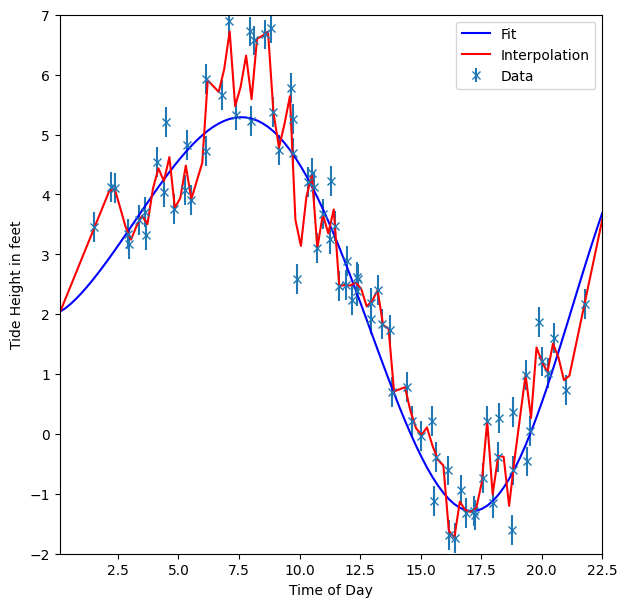

In [258]:
#--------------------------------------------------------Copy of Concept Setup----------------------------------------------------------
            # Putting the "Concept Setup" inside the graphing cell is required in order to circomvent a bug
            #The bug stopped the graphing portion from graphing unless the 'Concept Setup' was just ran. 
y = []
x = []
y_err = 0.25 #might be an error point bc idk what float32 does exactily
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


#Inter-day graph will give a compulation of all the tide hights per day
#The stucture needed to build this graph is already setup.

for i in range(82):
    x.append(hours[i] + mins_converted[i])
    #The only different between the intra-day graph and the inter-day graph, is that Inter-day graph does not count days

#-----------------------------Best Fit Line----------------------------------

# create a function that for a given time(in hours), comoputes a hight using linear interpolation
hight_interpol = interpolate.interp1d(x, y, kind = 'linear', fill_value = 'extrapolate')

#define the fit model
def hight_model(x_1, a, b, c, d):
    return a*np.sin(((x_1**b)/c) + d) + 2

#preform the fit
params, params_cov = optimize.curve_fit(hight_model, x, y, p0 = [3, 1, 5, 0], bounds=([-5,0,-10,0],[5,2,10,3]))   #Stearting parameters for a, b, c, and d

# define the error array
param_err = np.sqrt(np.diag(params_cov))

#use the fitted parameters to define a best-fit function
def hight_fit(x_1):
    return hight_model(x_1, params[0], params[1], params[2], params[3])
# alternarively hight model(hours, **params)

n = 100
test_hours = np.linspace(0.1, 22.5, n)  
#make a guess using interpolator
test_hight_int = hight_interpol(test_hours)            # Maybe an Error point
#make a guess using best fit func
test_hight_fit = hight_fit(test_hours)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

#-------------------------------------------------------plot data--------------------------------------

ax.errorbar(x, y, y_err, fmt='x', label = 'Data')
ax.plot(test_hours, hight_fit(test_hours), 'b-', label = 'Fit')
ax.plot(test_hours, test_hight_int, 'r-', label = 'Interpolation')

ax.set_xlabel('Time of Day')
ax.set_ylabel('Tide Height in feet')
ax.legend(loc = 0)
ax.set_ylim(-2, 7)
ax.set_xlim(0.1, 22.5)
  
plt.savefig('Inter-day', dpi=200)
plt.show()
